In [69]:
import pandas as pd
import geopandas as gpd

In [80]:
students = pd.read_csv("students.csv")
schools = pd.read_excel("finalized_schools.xlsx")

schools = schools[schools["Status"].isna()]

C:\Users\diego\AppData\Local\Temp\ipykernel_30236\3980537726.py:1: DtypeWarning: Columns (1,267,268,269,270,271,272,273,274,275,280,281,282,283,284,285,286,287,288,290,292,296,709,715) have mixed types. Specify dtype option on import or set low_memory=False.
  students = pd.read_csv("students.csv")


In [81]:
students_in_schools_with_status = students[students["School Code"].isin(schools["School Code"])]
students_in_schools_with_status.head()

,School Code,Grade,Address,TOWN,TOWN_ID,TYPE,COUNTY,FIPS_STCO,FOURCOLOR,POP1960,...,Tract median family income as a percentage of the MSA/MD median family income,FFIEC Estimated MSA/MD median family income,Income indicator,CRA poverty criteria?,CRA unemployment criteria?,CRA distressed criteria?,CRA remote rural (low density) criteria?,Previous year CRA distressed criteria?,Previous year CRA underserved criterion?,Meets at least one of current or previous year's CRA distressed/underserved tract criteria?
0,THAYER CAMPUS,10,"58 Second ST Apt B Framingham, MA 01702",FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,35.50,146600.0,Low,No,No,No,No,No,No,No
1,THAYER CAMPUS,11,"7 Barbieri RD Framingham, MA 01702",FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,74.80,146600.0,Moderate,No,No,No,No,No,No,No
2,THAYER CAMPUS,12,"120 Grant ST Framingham, MA 01702",FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,71.91,146600.0,Moderate,No,No,No,No,No,No,No
3,THAYER CAMPUS,11,157 Grant ST Framingham MA 01702,FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,71.91,146600.0,Moderate,No,No,No,No,No,No,No
4,THAYER CAMPUS,10,364 Irving Street Apt Block A - apt 105 Framin...,FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,38.61,146600.0,Low,No,No,No,No,No,No,No


In [72]:
with open("finalized_students.csv", "w") as f:
    students_in_schools_with_status.to_csv(f, index=False)

In [73]:
df = students_in_schools_with_status.copy(deep=True)

del df['geometry']
df = df[(df['Geocodio Latitude'] != 0) & (df['Geocodio Longitude'] != 0)]

geometry = gpd.points_from_xy(df["Geocodio Longitude"], df["Geocodio Latitude"])
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4269")
gdf

,School Code,Grade,Address,TOWN,TOWN_ID,TYPE,COUNTY,FIPS_STCO,FOURCOLOR,POP1960,...,FFIEC Estimated MSA/MD median family income,Income indicator,CRA poverty criteria?,CRA unemployment criteria?,CRA distressed criteria?,CRA remote rural (low density) criteria?,Previous year CRA distressed criteria?,Previous year CRA underserved criterion?,Meets at least one of current or previous year's CRA distressed/underserved tract criteria?,geometry
0,THAYER CAMPUS,10,"58 Second ST Apt B Framingham, MA 01702",FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,146600.0,Low,No,No,No,No,No,No,No,POINT (-71.39995 42.2763)
1,THAYER CAMPUS,11,"7 Barbieri RD Framingham, MA 01702",FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,146600.0,Moderate,No,No,No,No,No,No,No,POINT (-71.43026 42.26333)
2,THAYER CAMPUS,12,"120 Grant ST Framingham, MA 01702",FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,146600.0,Moderate,No,No,No,No,No,No,No,POINT (-71.41058 42.28235)
3,THAYER CAMPUS,11,157 Grant ST Framingham MA 01702,FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,146600.0,Moderate,No,No,No,No,No,No,No,POINT (-71.40923 42.28333)
4,THAYER CAMPUS,10,364 Irving Street Apt Block A - apt 105 Framin...,FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,146600.0,Low,No,No,No,No,No,No,No,POINT (-71.40645 42.26991)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,WAL,6,23 Juniper lane Framingham MA 01701,FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,146600.0,Middle,No,No,No,No,No,No,No,POINT (-71.44164 42.33312)
8856,WAL,8,23 Juniper lane Framingham MA 01701,FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,146600.0,Middle,No,No,No,No,No,No,No,POINT (-71.44164 42.33312)
8857,WAL,7,12 Harmony LN Apt B Framingham MA 01702,FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,146600.0,Moderate,No,No,No,No,No,No,No,POINT (-71.43951 42.26806)
8858,WAL,7,50 Dinsmore AV Apt 404 Framingham MA 01702,FRAMINGHAM,100.0,C,MIDDLESEX,25017.0,4.0,44526.0,...,146600.0,Moderate,No,No,No,No,No,No,No,POINT (-71.40167 42.29601)


<Axes: >

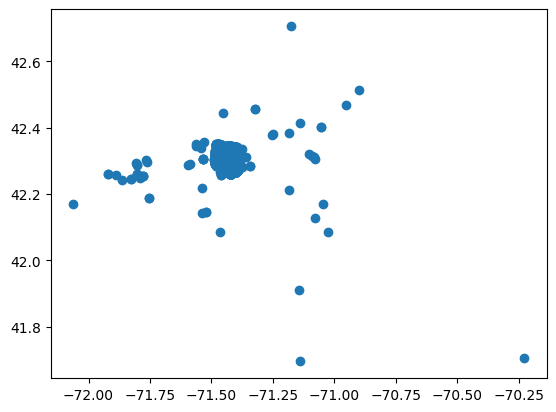

In [74]:

gdf.plot()

<Axes: >

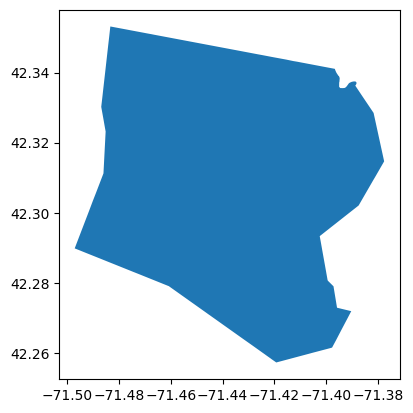

In [75]:
school_districts = gpd.read_file("census/tl_2025_25_unsd.shp")
framingham_district = school_districts[school_districts["NAME"].str.startswith("Framingham")]

framingham_district.plot()

<Axes: >

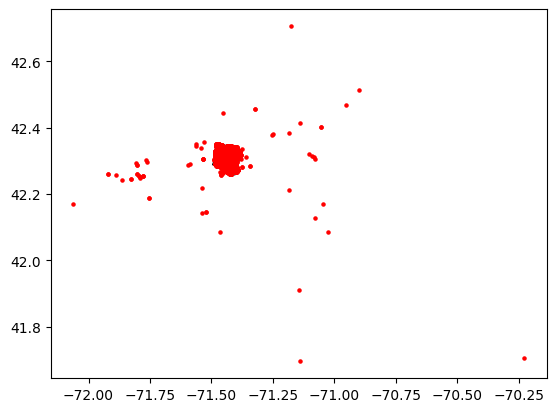

In [76]:
base = framingham_district.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

<Axes: >

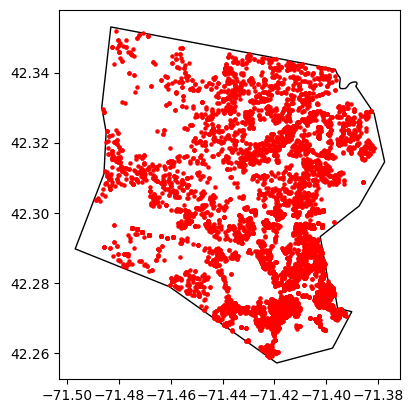

In [77]:
within = [geo.within(framingham_district.geometry.iloc[0]) for geo in gdf.geometry]
within_students = gdf[within]

import contextily as cx

base = framingham_district.plot(color='white', edgecolor='black')
within_students.plot(ax=base, marker='o', color='red', markersize=5)

In [78]:
percentage_within = len(within_students) / len(gdf)
print(f"{percentage_within:.2%} of students are within the Framingham school district.")

99.08% of students are within the Framingham school district.


<Axes: >

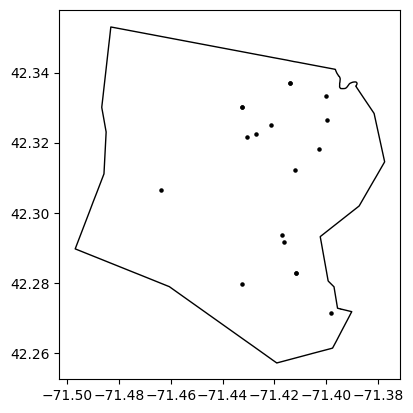

In [ ]:
# geocode all the schools

school_geometry = gpd.points_from_xy(schools["Geocodio Longitude"], schools["Geocodio Latitude"])
school_gdf = gpd.GeoDataFrame(schools, geometry=school_geometry, crs="EPSG:4269")

base = framingham_district.plot(color='white', edgecolor='black')
school_gdf.plot(ax=base, marker='o', color='black', markersize=5)

In [ ]:
# Calculate average distance to school for students within the district
# use the school code to find the corresponding school for each student, then calculate the distance

within_students = within_students.assign(
    school_geometry=within_students["School Code"].map(school_gdf.set_index("School Code").geometry)
)

In [ ]:
CRS = "EPSG:26986"  # Massachusetts State Plane Mainland
school_gdf = school_gdf.to_crs(CRS)

def get_distance_to_school(student_row):
    school_code = student_row["School Code"]
    school_row = school_gdf[school_gdf["School Code"] == school_code]
    if len(school_row) == 0:
        return None
    school_geometry = school_row.geometry.iloc[0]
    return student_row.geometry.distance(school_geometry)

in_meters_crs = within_students.to_crs("EPSG:26986")
in_meters_crs = in_meters_crs.assign(
    distance_to_school=in_meters_crs.apply(get_distance_to_school, axis=1)
)

In [112]:
average_distance = in_meters_crs["distance_to_school"].mean()
print(f"Average distance to school for students within the district: {average_distance:.2f} meters")

Average distance to school for students within the district: 3495.17 meters


In [178]:
# get block groups within school district and their median income

income = pd.read_csv("income.csv")
income.rename(columns={"Geo__geoid_": "GEOID", "SE_A14006_001": "income"}, inplace=True)
block_groups = gpd.read_file("block_groups/tl_2025_25_bg.shp")

block_groups["GEOID"] = block_groups["GEOID"].astype(str)
income["GEOID"] = income["GEOID"].astype(str)

block_groups = block_groups.merge(income, left_on="GEOID", right_on="GEOID")
# combine based on GEOID

only_bg_inside = [geo.within(framingham_district.geometry.iloc[0]) for geo in block_groups.geometry]
within_block_groups = block_groups[only_bg_inside]

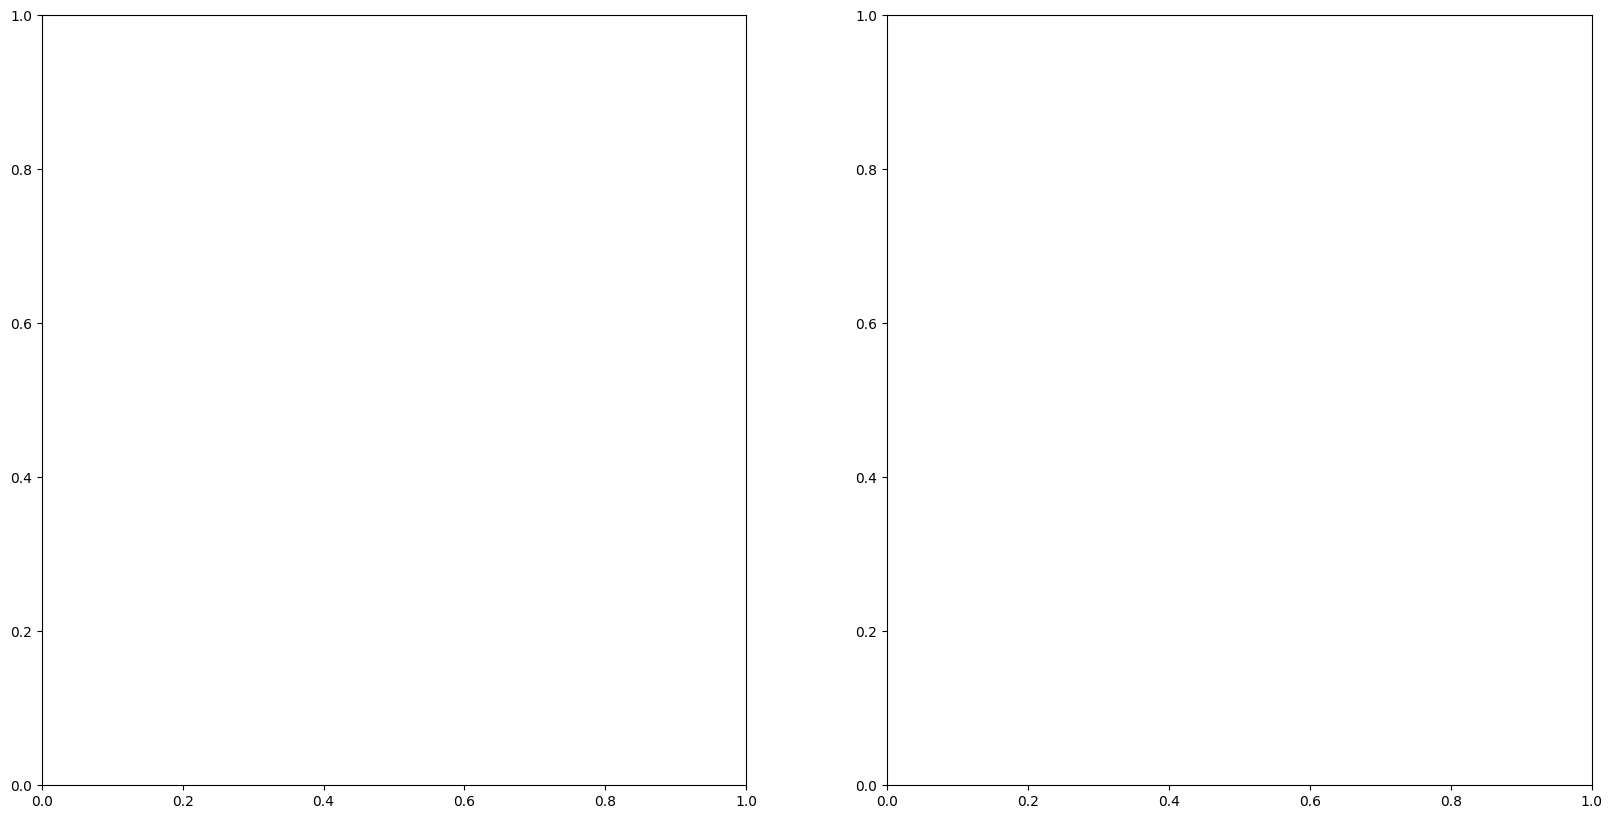

In [186]:
# plot next to each other
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

[]

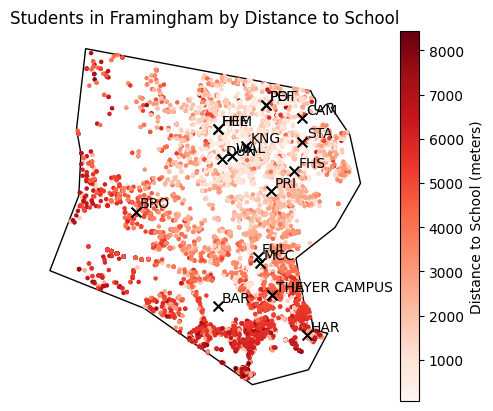

: 

In [ ]:
# Map of students based on distnace to school

base = framingham_district.to_crs(CRS).plot(color='white', edgecolor='black')
ax = in_meters_crs.plot(ax=base, column='distance_to_school', cmap='Reds', marker='o', markersize=5, legend=True, legend_kwds={'label': "Distance to School (meters)"})
school_gdf.to_crs(CRS).plot(ax=base, marker='x', color='black', markersize=50)

ax.set_title("Students in Framingham by Distance to School")
ax.set_axis_off()

for x, y, label in zip(school_gdf.geometry.x, school_gdf.geometry.y, school_gdf["School Code"]):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

ax.plot()

In [188]:
within_block_groups.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geo_NAME,Geo_qname,Geo_AREALAND,Geo_AREAWATER,income
63,25,017,383102,2,250173831022,1500000US250173831022,Block Group 2,G5030,S,342612,0,+42.2763952,-071.3994365,"POLYGON ((-71.40256 42.27527, -71.40165 42.276...","Block Group 2, Census Tract 3831.02, Middlesex...","Block Group 2, Census Tract 3831.02, Middlesex...",342612,0,48191.0
64,25,017,383101,2,250173831012,1500000US250173831012,Block Group 2,G5030,S,1181213,8102,+42.2628644,-071.4121402,"POLYGON ((-71.41845 42.27315, -71.4183 42.2736...","Block Group 2, Census Tract 3831.01, Middlesex...","Block Group 2, Census Tract 3831.01, Middlesex...",1181213,8102,100893.0
65,25,017,383200,2,250173832002,1500000US250173832002,Block Group 2,G5030,S,508307,302355,+42.2661673,-071.4264950,"POLYGON ((-71.43139 42.26736, -71.43136 42.267...","Block Group 2, Census Tract 3832, Middlesex Co...","Block Group 2, Census Tract 3832, Middlesex Co...",508307,302355,92336.0
66,25,017,383200,3,250173832003,1500000US250173832003,Block Group 3,G5030,S,347016,655,+42.2726091,-071.4228537,"POLYGON ((-71.42946 42.27201, -71.42911 42.272...","Block Group 3, Census Tract 3832, Middlesex Co...","Block Group 3, Census Tract 3832, Middlesex Co...",347016,655,74688.0
67,25,017,383200,4,250173832004,1500000US250173832004,Block Group 4,G5030,S,999451,0,+42.2706171,-071.4350505,"POLYGON ((-71.44462 42.27059, -71.44377 42.271...","Block Group 4, Census Tract 3832, Middlesex Co...","Block Group 4, Census Tract 3832, Middlesex Co...",999451,0,152303.0


[]

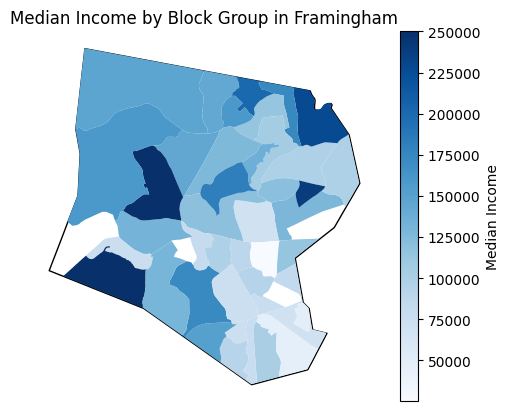

In [192]:
# plot median income by block group

base_m = framingham_district.to_crs(CRS).plot(color='white', edgecolor='black')
ax_m = within_block_groups.to_crs(CRS).plot(ax=base_m, column='income', cmap='Blues', legend=True, legend_kwds={'label': "Median Income"})
ax_m.set_title("Median Income by Block Group in Framingham")

ax_m.set_axis_off()
ax_m.plot()